### ASSIGNMENT - 7

In [10]:
import numpy
import scipy
import sklearn
import nltk

In [3]:
document = "Natural Language Processing is a fascinating field of AI. NLP helps machines understand human language."

In [4]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(document)
print("Tokenized Words:", tokens)

Tokenized Words: ['Natural', 'Language', 'Processing', 'is', 'a', 'fascinating', 'field', 'of', 'AI', '.', 'NLP', 'helps', 'machines', 'understand', 'human', 'language', '.']


In [5]:
pos_tags = nltk.pos_tag(tokens)
print("POS Tags:", pos_tags)

POS Tags: [('Natural', 'JJ'), ('Language', 'NNP'), ('Processing', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('fascinating', 'JJ'), ('field', 'NN'), ('of', 'IN'), ('AI', 'NNP'), ('.', '.'), ('NLP', 'NNP'), ('helps', 'VBZ'), ('machines', 'NNS'), ('understand', 'JJ'), ('human', 'JJ'), ('language', 'NN'), ('.', '.')]


In [6]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
print("After Stop Words Removal:", filtered_tokens)

After Stop Words Removal: ['Natural', 'Language', 'Processing', 'fascinating', 'field', 'AI', '.', 'NLP', 'helps', 'machines', 'understand', 'human', 'language', '.']


In [7]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed = [stemmer.stem(word) for word in filtered_tokens]
lemmatized = [lemmatizer.lemmatize(word) for word in filtered_tokens]

print("Stemmed Words:", stemmed)
print("Lemmatized Words:", lemmatized)

Stemmed Words: ['natur', 'languag', 'process', 'fascin', 'field', 'ai', '.', 'nlp', 'help', 'machin', 'understand', 'human', 'languag', '.']
Lemmatized Words: ['Natural', 'Language', 'Processing', 'fascinating', 'field', 'AI', '.', 'NLP', 'help', 'machine', 'understand', 'human', 'language', '.']


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Using the same doc twice just to simulate multiple documents for IDF
documents = [
    "Natural Language Processing is a fascinating field of AI. NLP helps machines understand human language.",
    "Natural Language Processing is a fascinating field of AI. NLP helps machines understand human language."
]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Print TF-IDF scores
feature_names = tfidf_vectorizer.get_feature_names_out()
dense = tfidf_matrix.todense()
denselist = dense.tolist()

import pandas as pd
df = pd.DataFrame(denselist, columns=feature_names)
print(df)

     ai  fascinating  field  helps  human    is  language  machines  natural  \
0  0.25         0.25   0.25   0.25   0.25  0.25       0.5      0.25     0.25   
1  0.25         0.25   0.25   0.25   0.25  0.25       0.5      0.25     0.25   

    nlp    of  processing  understand  
0  0.25  0.25        0.25        0.25  
1  0.25  0.25        0.25        0.25  


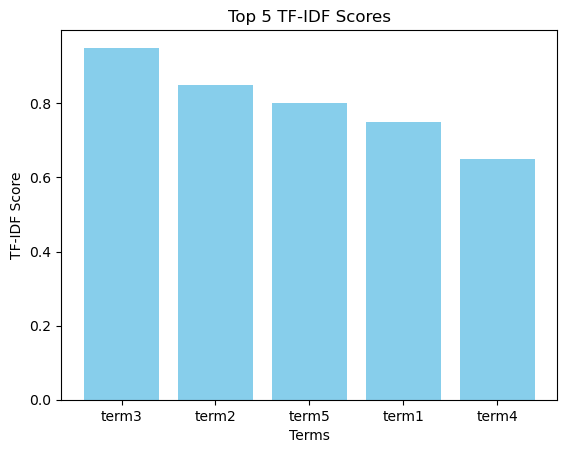

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Example TF-IDF scores 
terms = ['term1', 'term2', 'term3', 'term4', 'term5']
tfidf_scores = [0.75, 0.85, 0.95, 0.65, 0.80]

# Sort terms based on TF-IDF scores in descending order
sorted_indices = np.argsort(tfidf_scores)[::-1]
sorted_terms = np.array(terms)[sorted_indices]
sorted_scores = np.array(tfidf_scores)[sorted_indices]

# Plotting
plt.bar(sorted_terms, sorted_scores, color='skyblue')
plt.xlabel('Terms')
plt.ylabel('TF-IDF Score')
plt.title('Top 5 TF-IDF Scores')
plt.show()
